In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import Counter

from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.cit import kci

from epc import epc

In [3]:
"""
cg.G.graph[j,i]=1 and cg.G.graph[i,j]=-1 indicates  i --> j ,
cg.G.graph[i,j] = cg.G.graph[j,i] = -1 indicates i --- j,
cg.G.graph[i,j] = cg.G.graph[j,i] = 1 indicates i <-> j.
"""


def gdata(n):
    """
    Generate data based on a causal graph

    Args:
        n (int): Number of samples.

    Returns:
        np.ndarray
    """
    trueSk = np.zeros((4, 4), dtype=int)
    for i in range(4):
        for j in range(i + 1, 4):
            e = int(np.random.rand() < 0.5)
            trueSk[i, j] = e
            trueSk[j, i] = e
    X1 = np.random.normal(0, 1, n)
    if trueSk[0,1]:
        X2 = np.random.normal(0, 1, n) + np.random.uniform(0,1,n) * X1
    else:
        X2 = np.random.normal(0, 1, n)
    
    if trueSk[0,2]:
        if trueSk[1,2]:
            X3 = np.random.normal(0, 1, n) + np.random.uniform(0,1,n) * X2 + np.random.uniform(0,1,n) * X1
        else:
            X3 = np.random.normal(0, 1, n) + np.random.uniform(0,1,n) * X1
    elif trueSk[1,2]:
        X3 = np.random.normal(0, 1, n) + np.random.uniform(0,1,n) * X2
    else:
        X3 = np.random.normal(0, 1, n)

    if trueSk[0,3]:
        if trueSk[1,3]:
            if trueSk[2,3]:
                X4 = np.random.normal(0, 1, n) + np.random.uniform(0,1,n) * X3 + np.random.uniform(0,1,n) * X2 + np.random.uniform(0,1,n) * X1
            else:
                X4 = np.random.normal(0, 1, n) + np.random.uniform(0,1,n) * X2 + np.random.uniform(0,1,n) * X1
        elif trueSk[2,3]:
            X4 = np.random.normal(0, 1, n) + np.random.uniform(0,1,n) * X3 + np.random.uniform(0,1,n) * X1
        else:
            X4 = np.random.normal(0, 1, n) + np.random.uniform(0,1,n) * X1
    elif trueSk[1,3]:
        if trueSk[2,3]:
            X4 = np.random.normal(0, 1, n) + np.random.uniform(0,1,n) * X3 + np.random.uniform(0,1,n) * X2
        else:
            X4 = np.random.normal(0, 1, n) + np.random.uniform(0,1,n) * X2
    elif trueSk[2,3]:
        X4 = np.random.normal(0, 1, n) + np.random.uniform(0,1,n) * X3
    else:
        X4 = np.random.normal(0, 1, n)
    
    data = np.array([X1, X2, X3, X4]).T

    
    return data, trueSk

In [3]:
t = 100
n = 800
err = 0

for i in tqdm(range(t), desc="Processing"):
    np.random.seed(i)
    data, trueSk = gdata(n)
    cg = pc(data, 0.01, kci, show_progress=False)
    sk = np.abs(cg.G.graph)
    if not np.all(np.abs(sk) == trueSk):
        err += 1
err/t

Processing: 100%|██████████| 100/100 [07:41<00:00,  4.62s/it]


0.06

In [ ]:
t = 100
n = 800
err_e = 0

for i in tqdm(range(t), desc="Processing"):
    np.random.seed(i)
    data, trueSk = gdata(n)
    ecg = epc(data, 0.1, "Gamma", 8, show_progress=False)
    esk =np.abs(ecg.G.graph)
    if not np.all(np.abs(esk) == trueSk):
        err_e += 1
err_e/t

Processing: 100%|██████████| 100/100 [08:43<00:00,  5.24s/it]


0.08

In [ ]:
t = 100
n = 800
err_e = 0

for i in tqdm(range(t), desc="Processing"):
    np.random.seed(i)
    data, trueSk = gdata(n)
    ecg = epc(data, 0.1, "ACAT", 2, show_progress=False)
    esk =np.abs(ecg.G.graph)
    if not np.all(np.abs(esk) == trueSk):
        err_e += 1
err_e/t

Processing: 100%|██████████| 100/100 [05:26<00:00,  3.26s/it]


0.13

In [ ]:
t = 100
n = 800
err_e = 0

for i in tqdm(range(t), desc="Processing"):
    np.random.seed(i)
    data, trueSk = gdata(n)
    ecg = epc(data, 0.1, "N", 8, show_progress=False)
    esk =np.abs(ecg.G.graph)
    if not np.all(np.abs(esk) == trueSk):
        err_e += 1
err_e/t

Processing: 100%|██████████| 100/100 [01:49<00:00,  1.09s/it]


0.25

In [ ]:
t = 100
n = 800
err_e = 0

for i in tqdm(range(t), desc="Processing"):
    np.random.seed(i)
    data, trueSk = gdata(n)
    ecg = epc(data, 0.1, "a", 8, show_progress=False)
    esk =np.abs(ecg.G.graph)
    if not np.all(np.abs(esk) == trueSk):
        err_e += 1
err_e/t

Processing: 100%|██████████| 100/100 [01:31<00:00,  1.10it/s]


0.45

---

In [ ]:
t = 100
errs = []
for n in [200,400,800,1200,1600]:
    err = 0
    for i in tqdm(range(t), desc="Processing"):
        np.random.seed(i)
        data, trueSk = gdata(n)
        cg = pc(data, 0.01, kci, show_progress=False)
        sk = np.abs(cg.G.graph)
        if not np.all(np.abs(sk) == trueSk):
            err += 1
    errs.append(err/t)
errs

In [ ]:
t = 100
errs_e = []
for n in [200,400,800,1200,1600]:
    err_e = 0
    for i in tqdm(range(t), desc="Processing"):
        np.random.seed(i)
        data, trueSk = gdata(n)
        ecg = epc(data, 0.1, "Gamma", 8, show_progress=False)
        esk =np.abs(ecg.G.graph)
        if not np.all(np.abs(esk) == trueSk):
            err_e += 1
    errs_e.append(err_e/t)
errs_e

Processing: 100%|██████████| 100/100 [19:05<00:00, 11.46s/it]


[0.51, 0.27, 0.08, 0.03, 0.09]

In [ ]:
t = 100
errs_e = []
for n in [200,400,800,1200,1600]:
    err_e = 0
    for i in tqdm(range(t), desc="Processing"):
        np.random.seed(i)
        data, trueSk = gdata(n)
        ecg = epc(data, 0.1, "Gamma", int(n/200), show_progress=False)
        esk =np.abs(ecg.G.graph)
        if not np.all(np.abs(esk) == trueSk):
            err_e += 1
    errs_e.append(err_e/t)
errs_e

Processing: 100%|██████████| 100/100 [08:36<00:00,  5.17s/it]


[0.41, 0.19, 0.08, 0.07, 0.09]

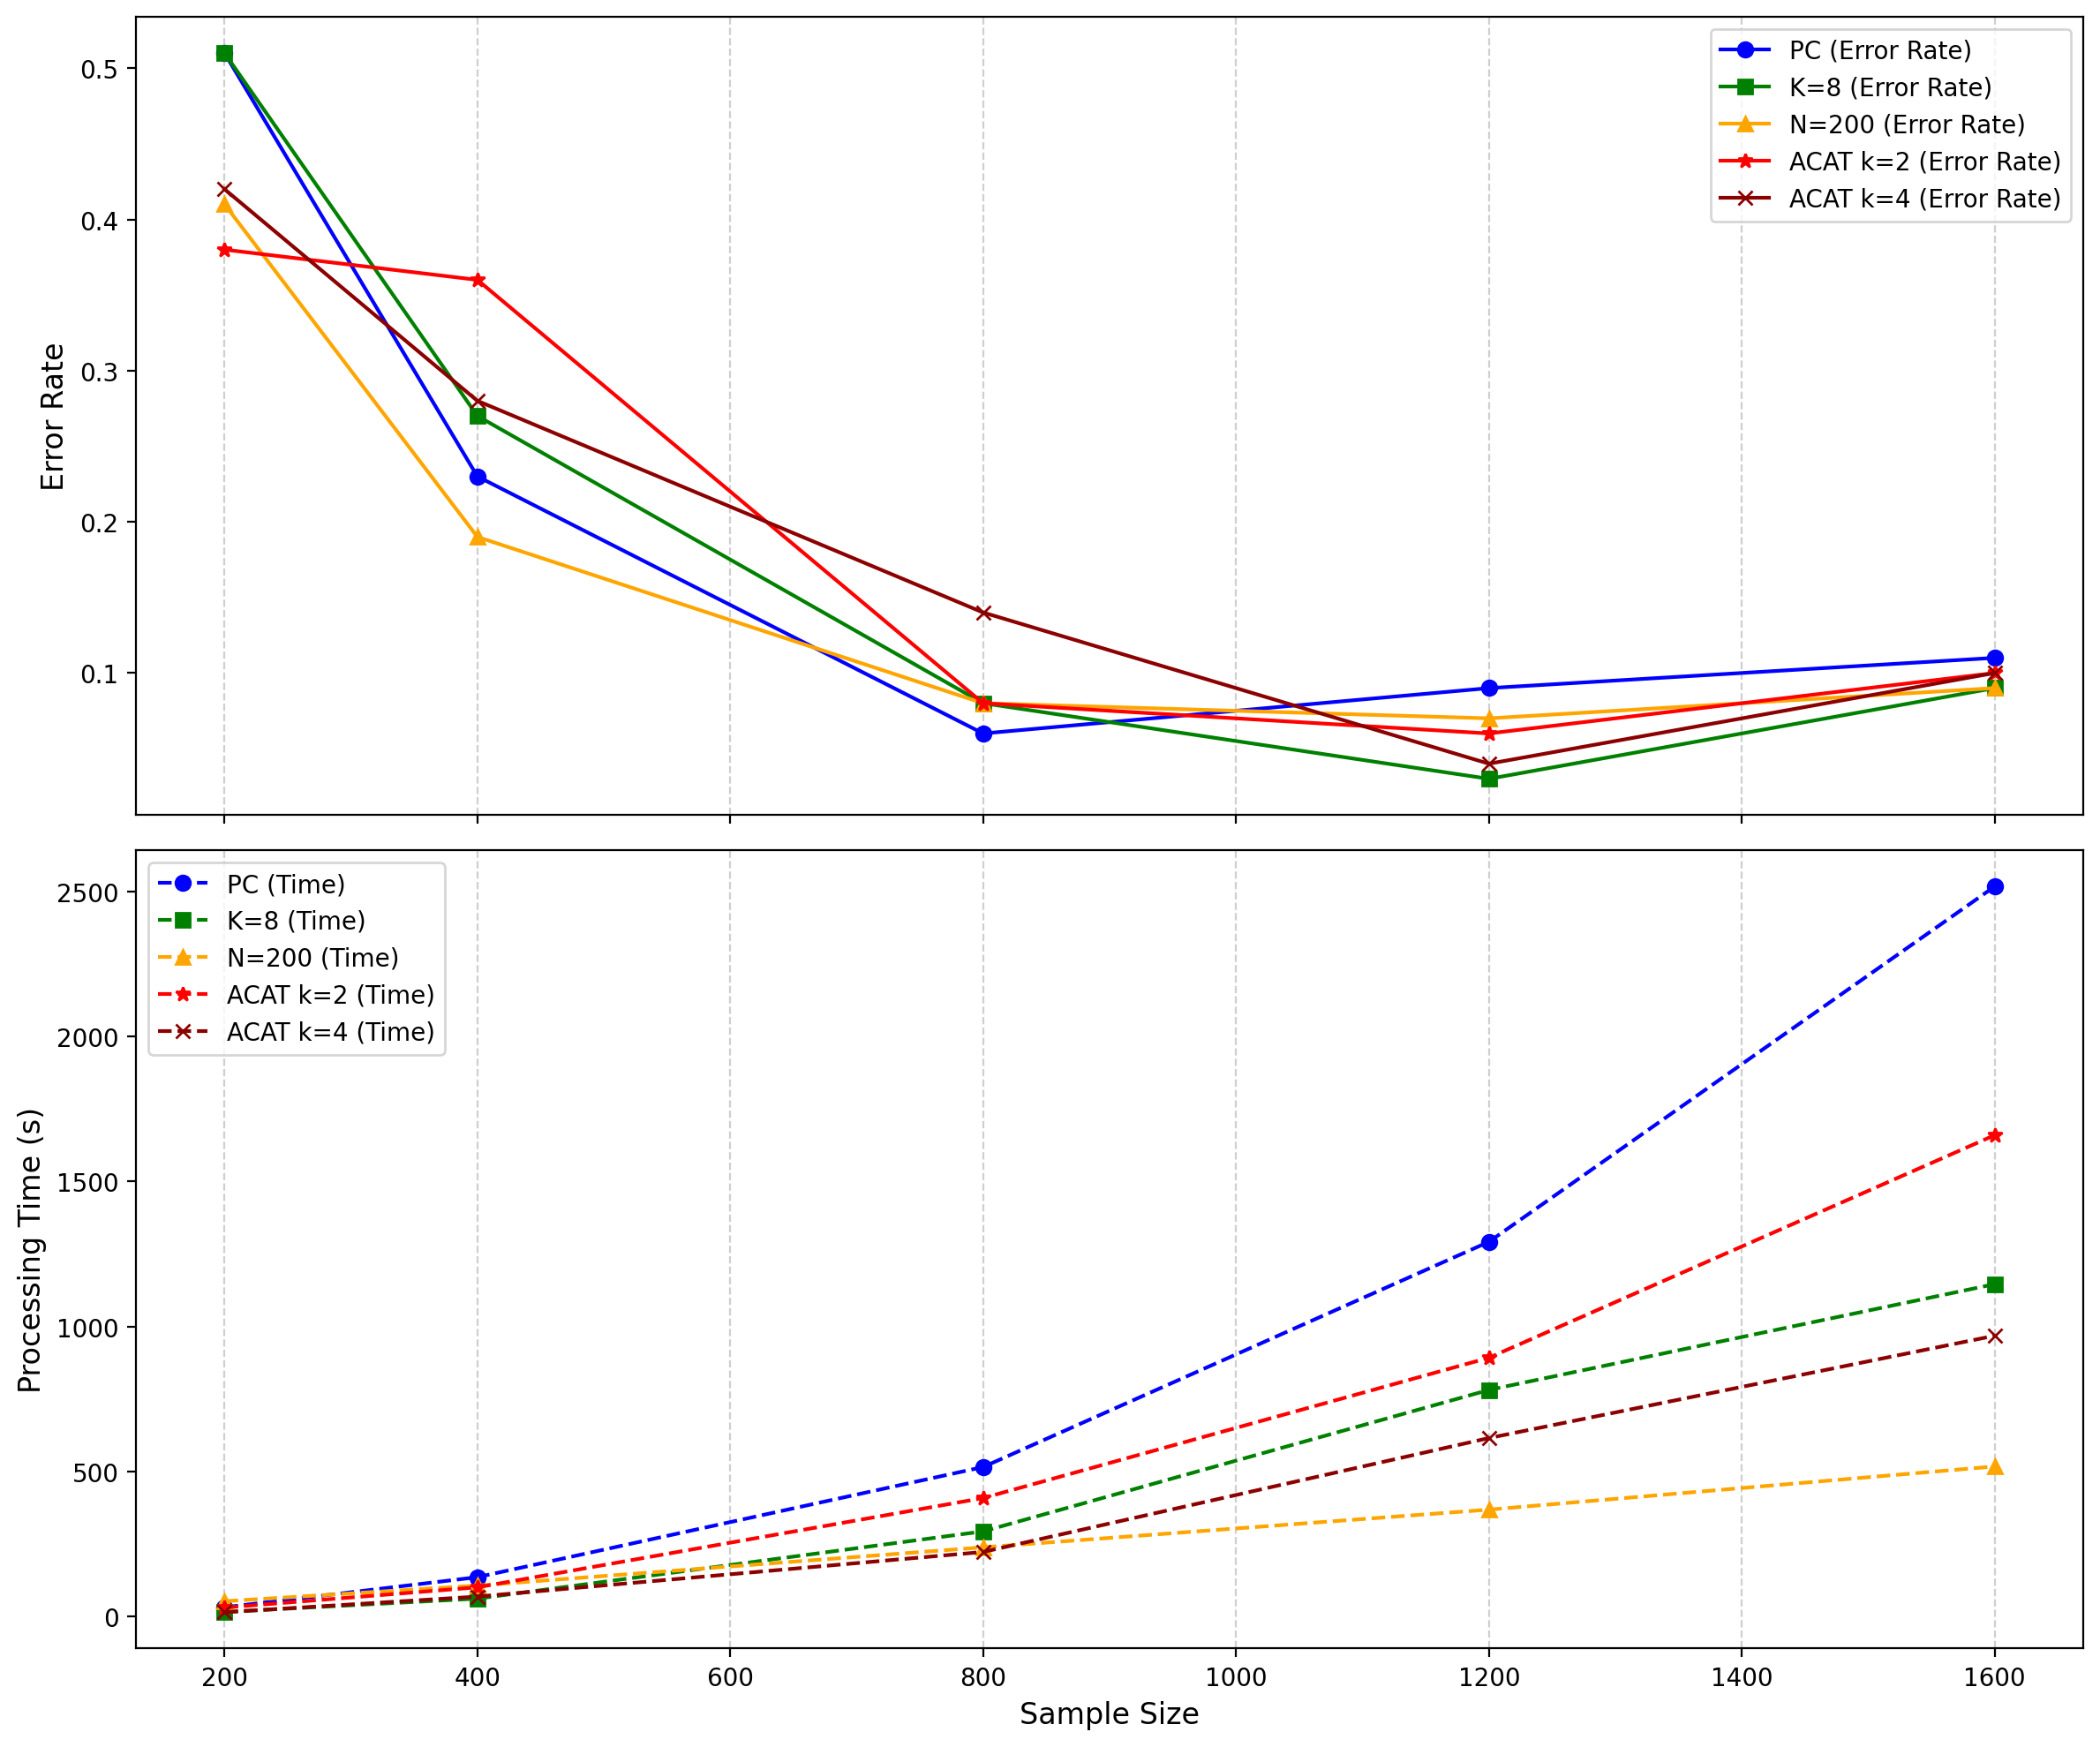

In [9]:
import matplotlib.pyplot as plt

# 数据定义
x = [200, 400, 800, 1200, 1600]  # x轴：样本大小
# 方法对应的时间数据（单位：秒）
time_pc = [31, 135, 515, 1292, 2518]
time_k8 = [15, 61, 293, 781, 1146]
time_n200 = [52, 106, 238, 368, 517]
time_acat2 = [30, 100, 408, 892, 1660]
time_acat4 = [14, 68, 222, 615, 968]
# 方法对应的结果数据
pc = [0.51, 0.23, 0.06, 0.09, 0.11]
k_8 = [0.51, 0.27, 0.08, 0.03, 0.09]
n_200 = [0.41, 0.19, 0.08, 0.07, 0.09]
acat2 = [0.38, 0.36, 0.08, 0.06, 0.1]
acat4 = [0.42, 0.28, 0.14, 0.04, 0.1]

# 创建一个包含上下两个子图的布局
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True, dpi=200)

# 子图1：性能指标
ax1.plot(x, pc, marker='o', label='PC (Error Rate)', color='blue')
ax1.plot(x, k_8, marker='s', label='K=8 (Error Rate)', color='green')
ax1.plot(x, n_200, marker='^', label='N=200 (Error Rate)', color='orange')
ax1.plot(x, acat2, marker='*', label='ACAT k=2 (Error Rate)', color='red')
ax1.plot(x, acat4, marker='x', label='ACAT k=4 (Error Rate)', color='darkred')
ax1.set_ylabel('Error Rate', fontsize=12)
ax1.legend(fontsize=10, loc='upper right')
ax1.grid(axis='x', linestyle='--', alpha=0.6)

# 子图2：处理时间
ax2.plot(x, time_pc, marker='o', label='PC (Time)', color='blue', linestyle='--')
ax2.plot(x, time_k8, marker='s', label='K=8 (Time)', color='green', linestyle='--')
ax2.plot(x, time_n200, marker='^', label='N=200 (Time)', color='orange', linestyle='--')
ax2.plot(x, time_acat2, marker='*', label='ACAT k=2 (Time)', color='red', linestyle='--')
ax2.plot(x, time_acat4, marker='x', label='ACAT k=4 (Time)', color='darkred', linestyle='--')
ax2.set_xlabel('Sample Size', fontsize=12)
ax2.set_ylabel('Processing Time (s)', fontsize=12)
ax2.legend(fontsize=10, loc='upper left')
ax2.grid(axis='x', linestyle='--', alpha=0.6)

# 调整布局
plt.tight_layout()
plt.show()

In [4]:
t = 50
errs_e = []
for n in [200,400,800,1200,1600]:
    err_e = 0
    for i in tqdm(range(t), desc="Processing"):
        np.random.seed(i)
        data, trueSk = gdata(n)
        ecg = epc(data, 0.1, "ACAT", 2, show_progress=False)
        esk =np.abs(ecg.G.graph)
        if not np.all(np.abs(esk) == trueSk):
            err_e += 1
    errs_e.append(err_e/t)
    print(errs_e[-1])
errs_e

Processing: 100%|██████████| 50/50 [00:15<00:00,  3.27it/s]


0.38


Processing: 100%|██████████| 50/50 [00:50<00:00,  1.02s/it]


0.36


Processing: 100%|██████████| 50/50 [03:24<00:00,  4.10s/it]


0.08


Processing: 100%|██████████| 50/50 [07:26<00:00,  8.94s/it]


0.06


Processing: 100%|██████████| 50/50 [13:50<00:00, 16.60s/it]

0.1


[0.38, 0.36, 0.08, 0.06, 0.1]

In [5]:
t = 50
errs_e = []
for n in [200,400,800,1200,1600]:
    err_e = 0
    for i in tqdm(range(t), desc="Processing"):
        np.random.seed(i)
        data, trueSk = gdata(n)
        ecg = epc(data, 0.1, "ACAT", 4, show_progress=False)
        esk =np.abs(ecg.G.graph)
        if not np.all(np.abs(esk) == trueSk):
            err_e += 1
    errs_e.append(err_e/t)
    print(errs_e[-1])
errs_e

Processing: 100%|██████████| 50/50 [00:07<00:00,  6.30it/s]


0.42


Processing: 100%|██████████| 50/50 [00:34<00:00,  1.45it/s]


0.28


Processing: 100%|██████████| 50/50 [01:51<00:00,  2.24s/it]


0.14


Processing: 100%|██████████| 50/50 [05:08<00:00,  6.17s/it]


0.04


Processing: 100%|██████████| 50/50 [08:04<00:00,  9.69s/it]

0.1


[0.42, 0.28, 0.14, 0.04, 0.1]